In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [8]:
def calcularDistribuicaoFrequencia(valores):
    # Contando as frequências por valor:
    distFreq = defaultdict(int)
    total = 0
    for valor in valores:
        distFreq[valor] += 1
        total += 1
    
    # Transformando em frequência relativa:
    for key in distFreq.keys():
        distFreq[key] /= total

    return distFreq

In [61]:
questionario = pd.read_csv("../data/Respostas-question2021.csv")
naoRespondeu = "-"

# 8a

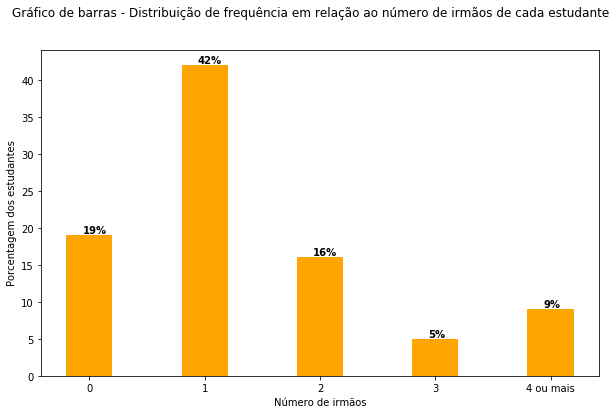

Proporção de famílias que tem 3 ou mais irmãos: 5% + 9% = 14%


In [29]:
colunaIrmaos = questionario["irmãos"]
distFreqIrmaos = calcularDistribuicaoFrequencia(colunaIrmaos)
numValores = len(distFreqIrmaos.keys())
numIrmaos = sorted(distFreqIrmaos.keys())
freqIrmaos = [distFreqIrmaos[irmaos] for irmaos in numIrmaos]

fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle("Gráfico de barras - Distribuição de frequência em relação ao número de irmãos de cada estudante")
ax.set_xlabel("Número de irmãos")
ax.set_ylabel("Porcentagem dos estudantes")

plt.bar(range(numValores), freqIrmaos, color="orange", width = 0.4, tick_label= numIrmaos)

for index, valor in enumerate(freqIrmaos):
    ax.text(index-0.06, valor+0.25, str(round(valor,2))+"%", color="black", fontweight='bold')

plt.show()

resposta = distFreqIrmaos['3']+distFreqIrmaos["4 ou mais"]
print(f"Proporção de famílias que tem 3 ou mais irmãos: {distFreqIrmaos['3']}% + {distFreqIrmaos['4 ou mais']}% = {resposta}%")


### Comentário:

# 8b

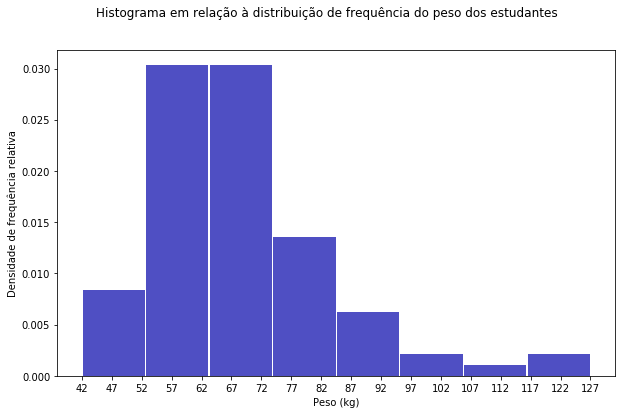

In [52]:
pesos = []
for peso in questionario["peso"]:
    if peso != naoRespondeu:
        pesos.append(int(peso))

fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle("Histograma em relação à distribuição de frequência do peso dos estudantes")
ax.set_xlabel("Peso (kg)")
ax.set_ylabel("Densidade de frequência relativa")
densidades, classes, _ = ax.hist(pesos, bins=8, color="#0504aa",density=True,rwidth=0.98)
plt.xticks(np.arange(min(pesos),max(pesos)+1,5.0))

# Cálculo da porcentagem de cada classe de frequência:
#n = len(classes)
#porcentagens = []
#for i in range(1,n):
#    porcentagens.append(100*densidades[i-1]*(classes[i]-classes[i-1]))

plt.show()


### Comentário:


# 8c

In [121]:
indiceHomens = questionario.loc[questionario["sexo"] == "masculino"]["ID"]
indiceMulheres = questionario.loc[questionario["sexo"] == "feminino"]["ID"]

pesoHomens = []
pesoMulheres = []

for ind in indiceHomens:
    peso = questionario.at[ind-1,"peso"]
    if peso != naoRespondeu:
        pesoHomens.append(int(peso))

for ind in indiceMulheres:
    peso = questionario.at[ind-1,"peso"]
    if peso != naoRespondeu:
        pesoMulheres.append(int(peso))

pesoHomensOrd = sorted(pesoHomens)
pesoMulheresOrd = sorted(pesoMulheres)

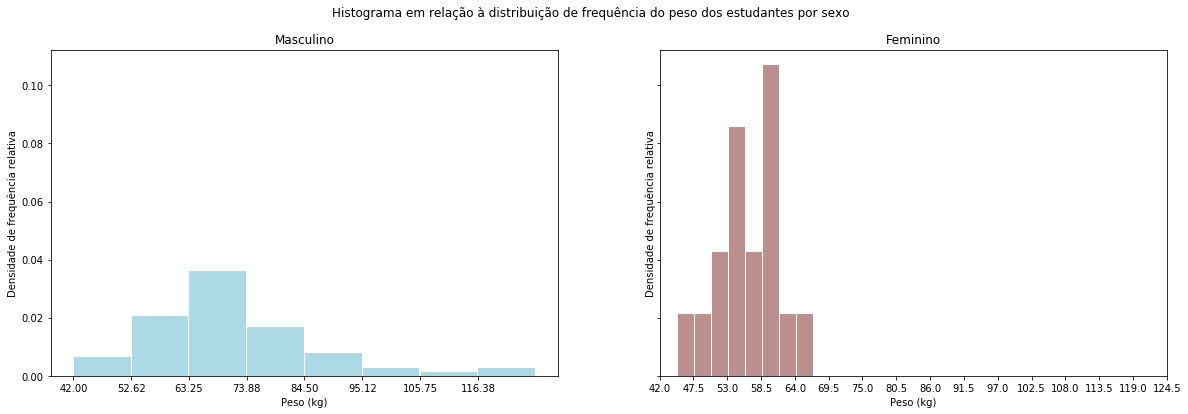

In [122]:
fig, (axH, axM) = plt.subplots(1,2,figsize=(20,6),sharey=True)
fig.suptitle("Histograma em relação à distribuição de frequência do peso dos estudantes por sexo")
pesoMinimo = min(pesoHomensOrd[0],pesoMulheresOrd[0])
pesoMaximo = max(pesoHomensOrd[-1],pesoMulheresOrd[-1])

# Homens:
axH.set_title("Masculino")
axH.set_xlabel("Peso (kg)")
axH.set_ylabel("Densidade de frequência relativa")
densidadesH, classesH, _ = axH.hist(pesoHomensOrd,bins=8, color="lightblue",density=True,rwidth=0.98)
tamClasse = (pesoHomensOrd[-1]-pesoHomensOrd[0])/8
axH.set_xticks(np.arange(pesoMinimo,pesoMaximo,tamClasse))

# Mulheres:
axM.set_title("Feminino")
axM.set_xlabel("Peso (kg)")
axM.set_ylabel("Densidade de frequência relativa")
densidadesM, classesM, _ = axM.hist(pesoMulheresOrd,bins=8, color="rosybrown",density=True,rwidth=0.95)
tamClasse = (pesoMulheresOrd[-1]-pesoMulheresOrd[0])/8
axM.set_xticks(np.arange(pesoMinimo,pesoMaximo+1,2*tamClasse))

plt.show()

# Cálculo da porcentagem de cada classe de frequência:
#n = len(classes)
#porcentagens = []
#for i in range(1,n):
#    porcentagens.append(100*densidades[i-1]*(classes[i]-classes[i-1]))

### Comentário:

/home/mateus/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


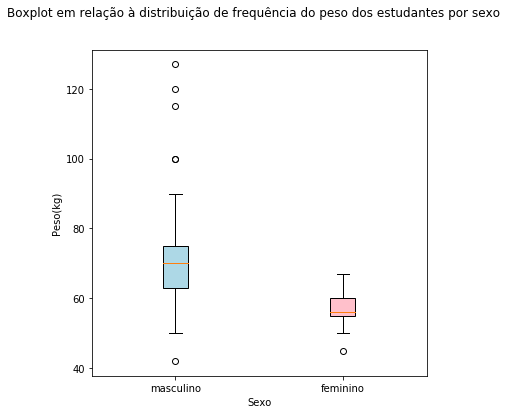

In [123]:
fig, ax = plt.subplots(figsize=(6,6))
fig.suptitle("Boxplot em relação à distribuição de frequência do peso dos estudantes por sexo")
ax.set_ylabel("Peso(kg)") 
ax.set_xlabel("Sexo")
rotulos = ["masculino","feminino"]
bplot = ax.boxplot([pesoHomens,pesoMulheres],vert=True,patch_artist=True,labels=rotulos,showfliers=True)

# Colorindo:
colors = ["lightblue","pink"]
for patch, color in zip(bplot["boxes"],colors):
    patch.set_facecolor(color)

plt.show()

### Comentário:

# 8d

In [142]:
altura = questionario["altura"]
altura = list(altura) 
pesos = list(pesos)
del(altura[28]) # deletando observação, pois seu peso não foi especificado e impossibilita sua inclusão no gráfico.


90 90


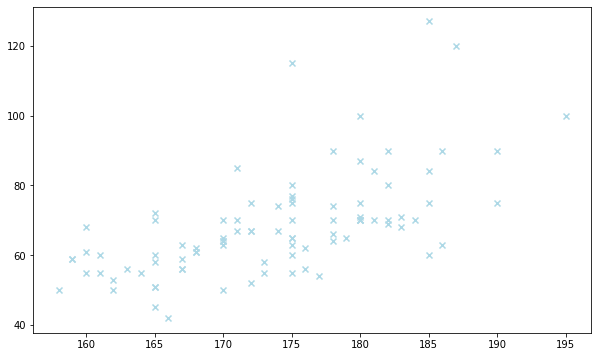

In [144]:
fig, ax = plt.subplots(figsize=(10,6))
print(len(altura),len(pesos))
ax.scatter(altura,pesos,color="lightblue",marker="x")
plt.show()